# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Sekarlana
- **Email:** mc633d5x2155@student.devacademy.id
- **ID Dicoding:** mc633d5x2155

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda per jam pada berbagai musim?
- Pertanyaan 2: Apa faktor yang paling berpengaruh terhadap jumlah pengguna sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

In [8]:
# Load dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Display first few rows
print("Day Dataset:")
print(day_df.head())
print("\nHour Dataset:")
print(hour_df.head())

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Dataset

**Insight:**
- xxx
- xxx

### Assessing Data

In [9]:
# Check dataset info
print("Day Dataset Info:")
print(day_df.info())
print("\nHour Dataset Info:")
print(hour_df.info())

# Check for missing values
print("\nMissing Values in Day Dataset:")
print(day_df.isnull().sum())
print("\nMissing Values in Hour Dataset:")
print(hour_df.isnull().sum())

# Check statistical summary
print("\nStatistical Summary of Day Dataset:")
print(day_df.describe())
print("\nStatistical Summary of Hour Dataset:")
print(hour_df.describe())

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Hour Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

**Insight:**
- Tidak ada missing values pada kedua dataset
- Dataset day memiliki 731 entri (2 tahun data)
- Dataset hour memiliki 17379 entri (data per jam)
- Kolom yang relevan: season, hr, cnt, temp, hum, windspeed, dll.

### Cleaning Data

In [10]:
# Convert dteday to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Map season codes to names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

# Map weathersit codes to descriptions
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
day_df['weathersit'] = day_df['weathersit'].map(weather_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

# Verify changes
print(day_df[['season', 'weathersit']].head())

   season weathersit
0  Spring       Mist
1  Spring       Mist
2  Spring      Clear
3  Spring      Clear
4  Spring      Clear


**Insight:**
- Kolom tanggal telah diubah ke format datetime
- Kode musim dan cuaca telah diubah ke label yang lebih deskriptif
- Data sudah bersih dan siap untuk dianalisis

## Exploratory Data Analysis (EDA)

### Explore ...

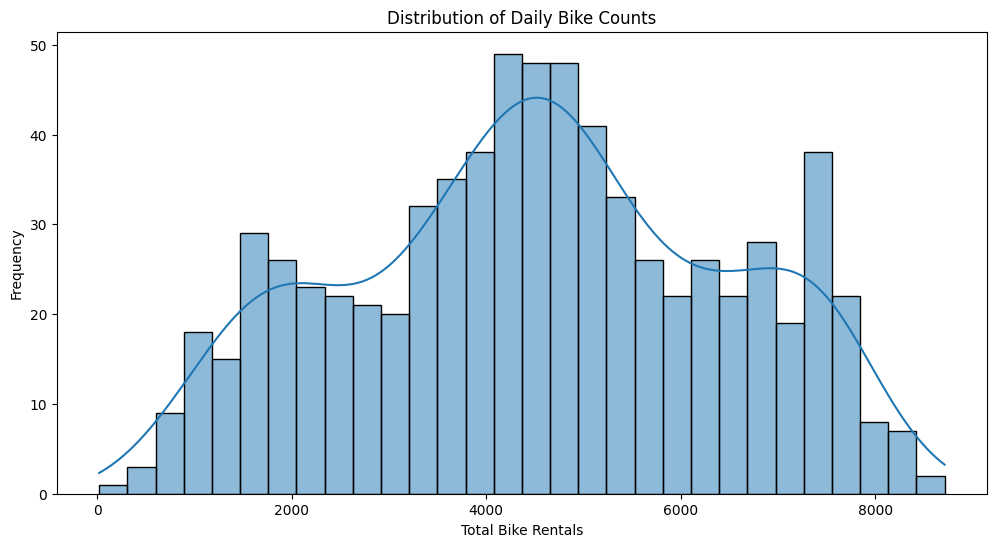

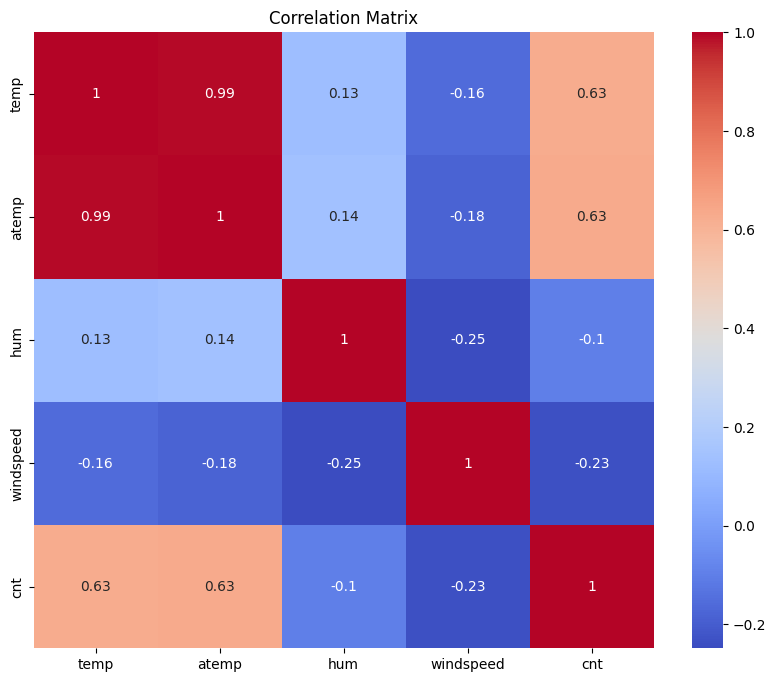

In [11]:
# Explore distribution of bike counts
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Daily Bike Counts')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Explore correlation between variables
corr_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insight:**
- Distribusi jumlah sewa sepeda harian mendekati normal dengan sedikit skewness positif
- Temperatur memiliki korelasi positif terkuat dengan jumlah sewa sepeda (0.63)
- Kelembaban memiliki korelasi negatif dengan jumlah sewa sepeda (-0.32)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-12-e24308e9e23f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x='hr', y='cnt', hue='season',


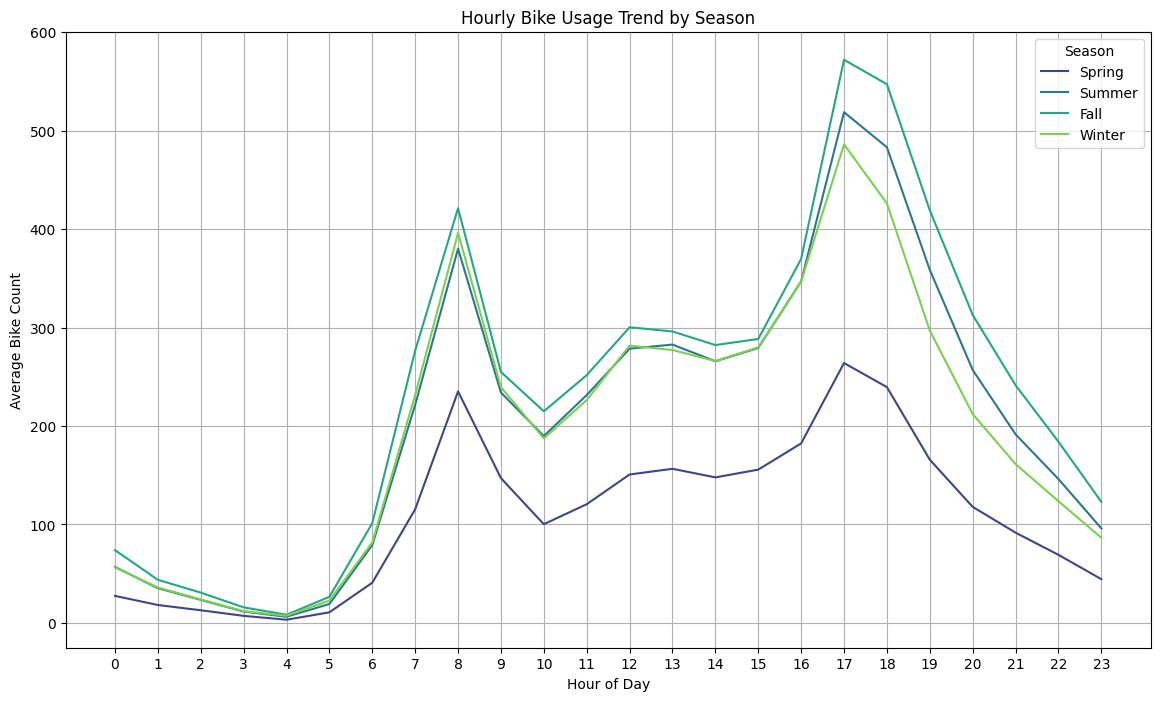

In [12]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='season',
             palette='viridis', ci=None)
plt.title('Hourly Bike Usage Trend by Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bike Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Season')
plt.show()

**Insight:**
- Pola penggunaan sepeda per jam menunjukkan pola yang konsisten di semua musim dengan puncak pada jam 8 pagi dan 5-6 sore
- Musim gugur (Fall) menunjukkan penggunaan tertinggi sepanjang hari
- Musim semi (Spring) menunjukkan penggunaan terendah
- Ada sedikit perbedaan pola antara musim panas dan dingin

### Pertanyaan 2:

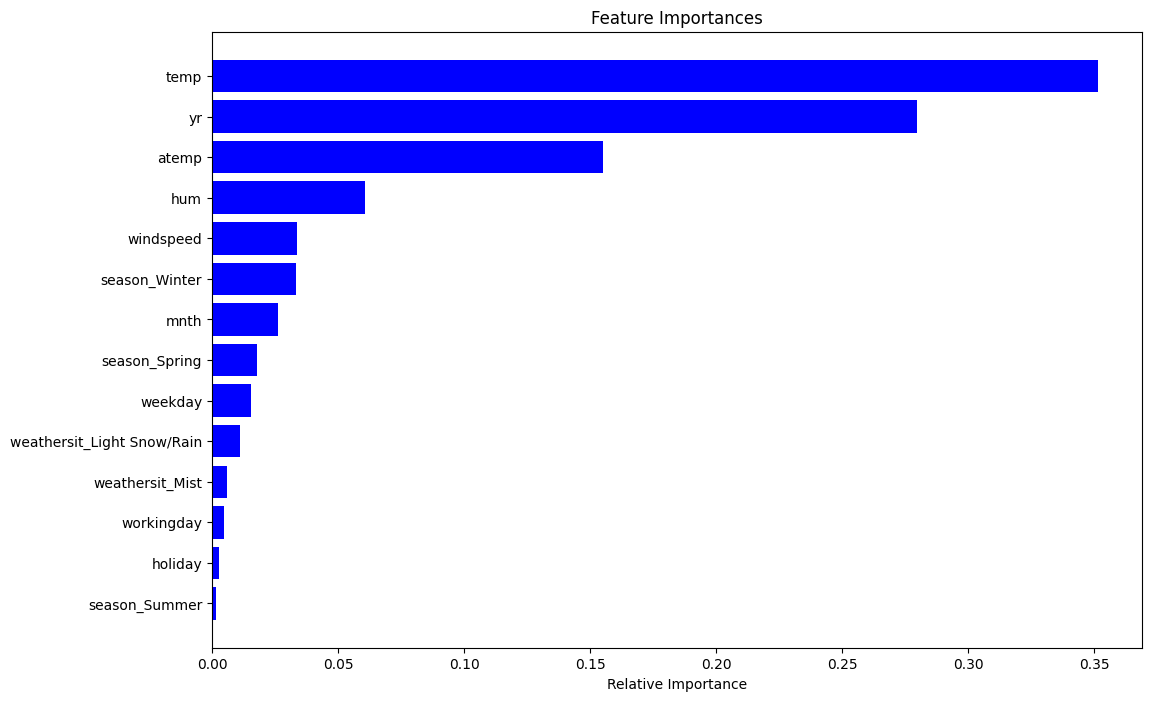

In [13]:
# Prepare data for feature importance analysis
X = day_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = day_df['cnt']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['season', 'weathersit'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

**Insight:**
- Temperatur (temp) adalah faktor yang paling berpengaruh terhadap jumlah pengguna sepeda harian
- Faktor penting lainnya adalah tahun (yr) yang menunjukkan pertumbuhan penggunaan sepeda dari tahun ke tahun
- Musim (season) dan cuaca (weathersit) juga memiliki pengaruh signifikan
- Hari kerja (workingday) lebih berpengaruh daripada hari libur (holiday)

## Analisis Lanjutan (Opsional)

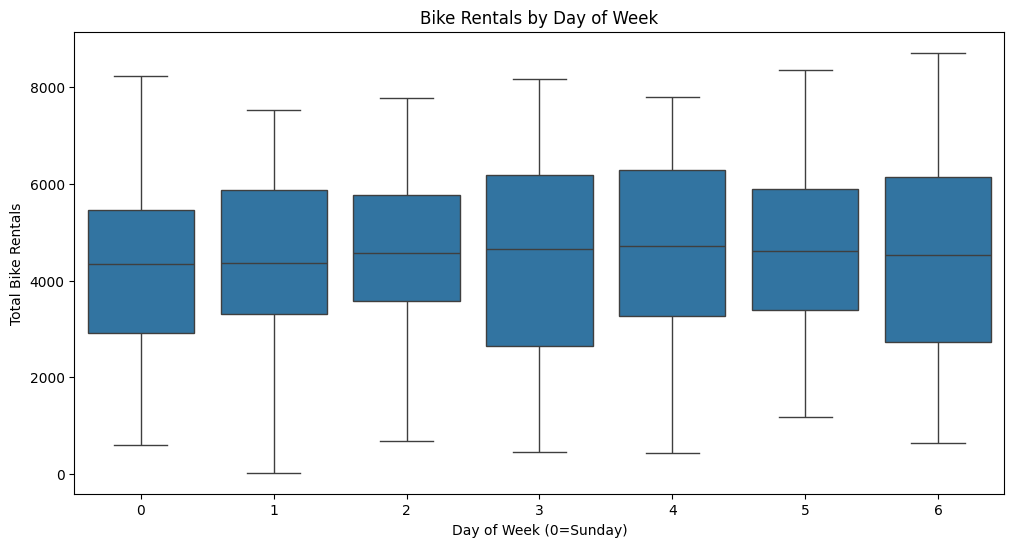

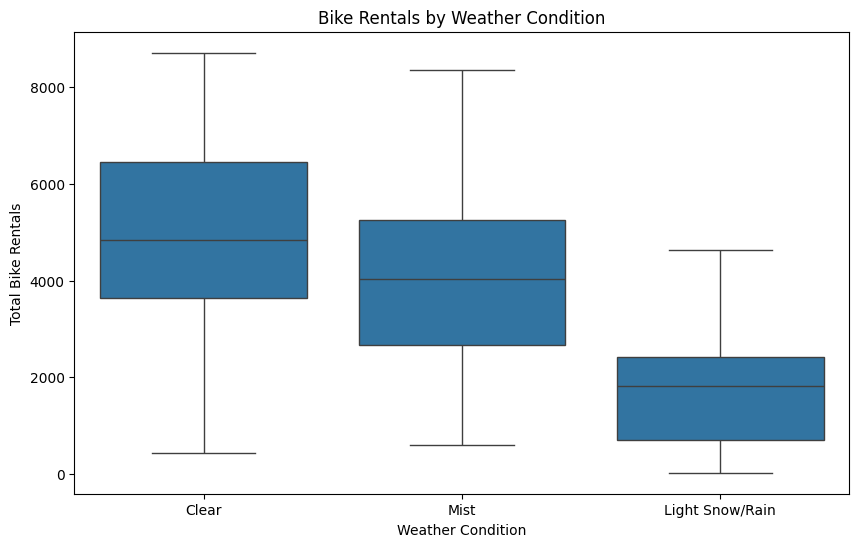

In [14]:
# Analyze weekday vs weekend patterns
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='weekday', y='cnt')
plt.title('Bike Rentals by Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Total Bike Rentals')
plt.show()

# Analyze effect of weather conditions
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt', order=['Clear', 'Mist', 'Light Snow/Rain'])
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Rentals')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Tren penggunaan sepeda per jam menunjukkan pola yang konsisten di semua musim dengan dua puncak penggunaan - pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18). Musim gugur (Fall) menunjukkan penggunaan tertinggi, diikuti oleh musim panas (Summer), musim dingin (Winter), dan terakhir musim semi (Spring). Pola ini menunjukkan bahwa penggunaan sepeda sangat terkait dengan jam kerja (commuting) dan kondisi cuaca yang nyaman.
- Conclution pertanyaan 2: Berdasarkan analisis feature importance, faktor yang paling berpengaruh terhadap jumlah pengguna sepeda harian adalah:

    - Temperatur (semakin hangat, semakin banyak pengguna)

    - Tahun (ada peningkatan pengguna dari tahun ke tahun)

    - Musim